In [2]:
import os
import pickle

import requests
import yaml
import pandas as pd

with open("config.yml") as ymlfile:
    config = yaml.safe_load(ymlfile)
SERP_API_KEY = config.get("SERP_API_KEY")
query = "machine learning"
url = f"https://serpapi.com/search.json?engine=google_jobs&q={query}&api_key={SERP_API_KEY}&hl=en&ltype=1"
data = []
if os.path.exists(f"cache_{query.replace(' ', '_')}.pkl"):
    with open(f"cache_{query.replace(' ', '_')}.pkl", "rb") as f:
        data = pickle.load(f)
else:
    response = requests.get(url)
    data.append(response.json())
    while response.json().get("serpapi_pagination"):
        next_page_token = response.json().get("serpapi_pagination").get("next_page_token")
        url = f"https://serpapi.com/search.json?engine=google_jobs&q={query}&api_key={SERP_API_KEY}&hl=en&ltype=1&next_page_token={next_page_token}"
        response = requests.get(url)
        data.append(response.json())
    with open(f"cache_{query.replace(' ', '_')}.pkl", "wb") as f:
        pickle.dump(data, f)


In [3]:
data_df = pd.json_normalize([item for sublist in data for item in sublist.get("jobs_results", [])])
data_df.head()

,title,company_name,location,via,share_link,thumbnail,extensions,description,job_highlights,apply_options,job_id,detected_extensions.posted_at,detected_extensions.schedule_type,detected_extensions.health_insurance,detected_extensions.salary,detected_extensions.paid_time_off,detected_extensions.dental_coverage,detected_extensions.work_from_home
0,"Machine Learning Engineer III, Search Data",Mapbox,"Washington, DC",DFJ Growth Job Board,https://www.google.com/search?ibp=htl;jobs&q=m...,https://serpapi.com/searches/67c20c15ecc674bf3...,"[1 day ago, Full-time]",Mapbox is the leading real-time location platf...,"[{'title': 'Qualifications', 'items': ['9+ yea...","[{'title': 'DFJ Growth Job Board', 'link': 'ht...",eyJqb2JfdGl0bGUiOiJNYWNoaW5lIExlYXJuaW5nIEVuZ2...,1 day ago,Full-time,NaN,NaN,NaN,NaN,NaN
1,Senior Machine Learning Engineer,Capital One,"McLean, VA (+1 other)",Capital One Careers,https://www.google.com/search?ibp=htl;jobs&q=m...,NaN,"[22 days ago, Full-time and Part-time, Health ...",Senior Machine Learning Engineer\n\nAs a Capit...,"[{'title': 'Qualifications', 'items': ['Bachel...","[{'title': 'Capital One Careers', 'link': 'htt...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgTWFjaGluZSBMZWFybm...,22 days ago,Full-time and Part-time,True,NaN,NaN,NaN,NaN
2,Machine Learning/ Artificial Intelligence Inte...,Infotrend Inc,"Washington, DC",LinkedIn,https://www.google.com/search?ibp=htl;jobs&q=m...,https://serpapi.com/searches/67c20c15ecc674bf3...,"[30 days ago, Internship]",Job Description\n\nThis position focuses on su...,"[{'title': 'Qualifications', 'items': ['Exampl...","[{'title': 'LinkedIn', 'link': 'https://www.li...",eyJqb2JfdGl0bGUiOiJNYWNoaW5lIExlYXJuaW5nLyBBcn...,30 days ago,Internship,NaN,NaN,NaN,NaN,NaN
3,Cyber Machine Learning Engineer Jobs,Booz Allen Hamilton,"Washington, DC",Security Clearance Jobs,https://www.google.com/search?ibp=htl;jobs&q=m...,NaN,"[6 days ago, Full-time, Health insurance]",Job Number: R0213916\n\nCyber Machine Learning...,"[{'title': 'Qualifications', 'items': ['3+ yea...","[{'title': 'Security Clearance Jobs', 'link': ...",eyJqb2JfdGl0bGUiOiJDeWJlciBNYWNoaW5lIExlYXJuaW...,6 days ago,Full-time,True,NaN,NaN,NaN,NaN
4,Multimodal Machine Learning Engineer Jobs,Booz Allen Hamilton,"Washington, DC",Clearance Jobs,https://www.google.com/search?ibp=htl;jobs&q=m...,NaN,"[4 days ago, Full-time, Health insurance]",Job Number: R0214106\n\nMultimodal Machine Lea...,"[{'title': 'Qualifications', 'items': ['As an ...","[{'title': 'Clearance Jobs', 'link': 'https://...",eyJqb2JfdGl0bGUiOiJNdWx0aW1vZGFsIE1hY2hpbmUgTG...,4 days ago,Full-time,True,NaN,NaN,NaN,NaN


In [4]:
cloud_text = ">>>>>----<<<<<".join(data_df.description.values)
with open("job_descriptions.txt", "w") as f:
    f.write(cloud_text)

In [5]:
from google import genai
from google.genai import types

if not os.path.exists("gemini_output_cache.txt"):
    api_key = config.get("GEMINI_API_KEY")# Add your API key here
    sys_instruct = "you will be handed a text containing job descriptions. extract the qualifications from them, whether the basic qualification or desired, including educational and experience related qualifications. return it as a text"  # Add your system prompt here
    user_prompt = cloud_text  # Add your user prompt here

    client = genai.Client(api_key=api_key)

    response = client.models.generate_content(
        model="gemini-2.0-flash",
        config=types.GenerateContentConfig(
            system_instruction=sys_instruct),
        contents=[user_prompt]
    )
    with open("gemini_output_cache.txt", "w") as f:
        f.write(response.text)
else:
    with open("gemini_output_cache.txt", "r") as f:
        response = f.read()
print(response.text)

Okay, here's the extracted list of qualifications from the provided job descriptions:

**Mapbox - Senior Machine Learning Engineer**

*   9+ years of industry experience working with machine learning models in production
*   A scientific mindset. Able to collect data, formulate hypotheses, and create experiments which test those hypotheses.
*   Excellent documentation skills to keep records of analyses, hypotheses, experiments, and operational metrics.
*   Experience with AWS technologies including Glue and EMR
*   Proficiency in SQL
*   Proficiency in at least one modern programming language (Python, Scala, or Java) suitable for machine learning and data processing
*   Familiarity with PySpark
*   Integrating data with APIs and querying data through APIs
*   *Nice to have:* Experience with geospatial data analysis and processing
*   *Nice to have:* Experience with data pipelines
*   *Nice to have:* Experience with Natural Language Processing (NLP) tools such as BERT

**Capital One - S

In [6]:
import re
from collections import Counter
qualifications = response.text
TOP_SELECTED = 90
def extract_phrases_distributions(text, phrase_length=3, top_selected=TOP_SELECTED):
    words = re.findall(r'\b\w+\b', text)

    # Count phrases with 3 words or less
    phrase_counts = Counter()

    # Count phrases of 1, 2, and 3 words
    for i in range(len(words)):
        for j in range(1, phrase_length - 1):  # j = 1, 2, 3 for phrases of 1, 2, and 3 words
            if i + j <= len(words):
                phrase = ' '.join(words[i:i + j])
                phrase_counts[phrase] += 1

    # Get the counts for plotting
    phrases = list(phrase_counts.keys())
    counts = list(phrase_counts.values())
    counts = {phrase: count for phrase, count in zip(phrases, counts)}
    sorted_dict = dict(sorted(counts.items(), key=lambda item: item[1]))
    return dict(sorted(sorted_dict.items(), key=lambda item: item[1], reverse=True)[:top_selected])

In [11]:
import matplotlib.pyplot as plt


top_90 = extract_phrases_distributions(qualifications)
def bar_plot(top_phrases, title="Counts of Phrases with 3 Words or Less"):
    top_selected = len(top_phrases)
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.bar([x for x in range(top_selected)], top_phrases.values())
    plt.xticks([x for x in range(top_selected)], labels=list(top_phrases.keys()), rotation=90)  # Rotate x-axis labels for better visibility
    plt.xlabel('Phrases')
    plt.ylabel('Counts')
    plt.title(title)
    plt.tight_layout()
    plt.show()

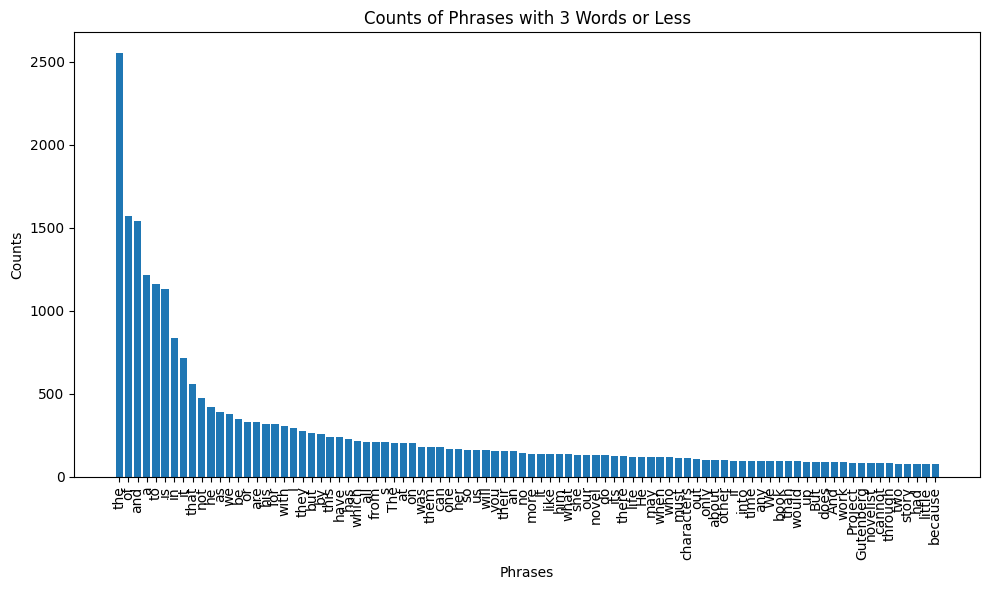

In [12]:
#find the distribution of the usual English language
control_text_url = "https://www.gutenberg.org/cache/epub/70492/pg70492.txt"
response = requests.get(control_text_url)
natural_text = response.text
top_90_control = extract_phrases_distributions(natural_text)
bar_plot(top_90_control)

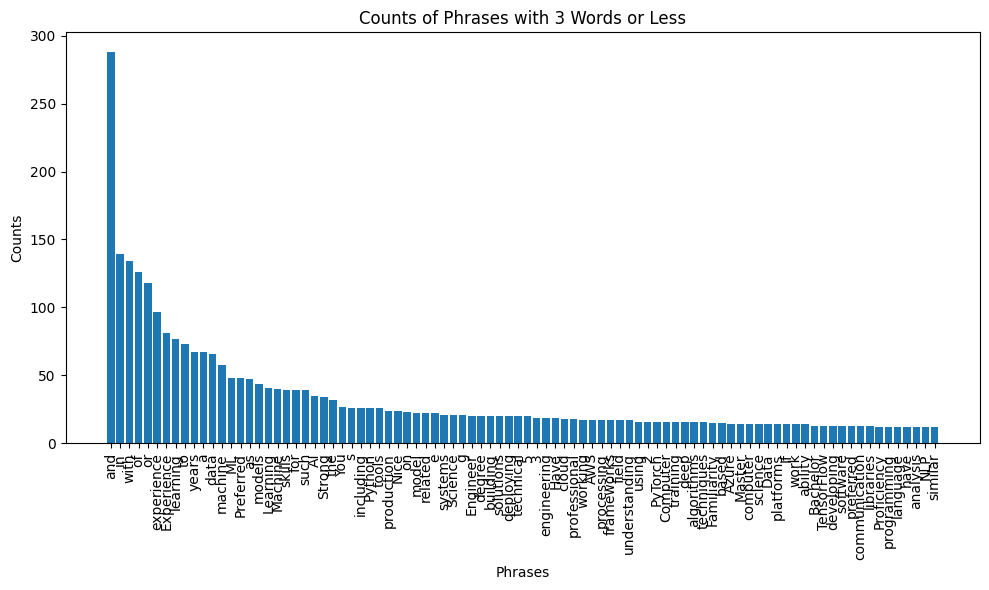

In [13]:
bar_plot(top_90)

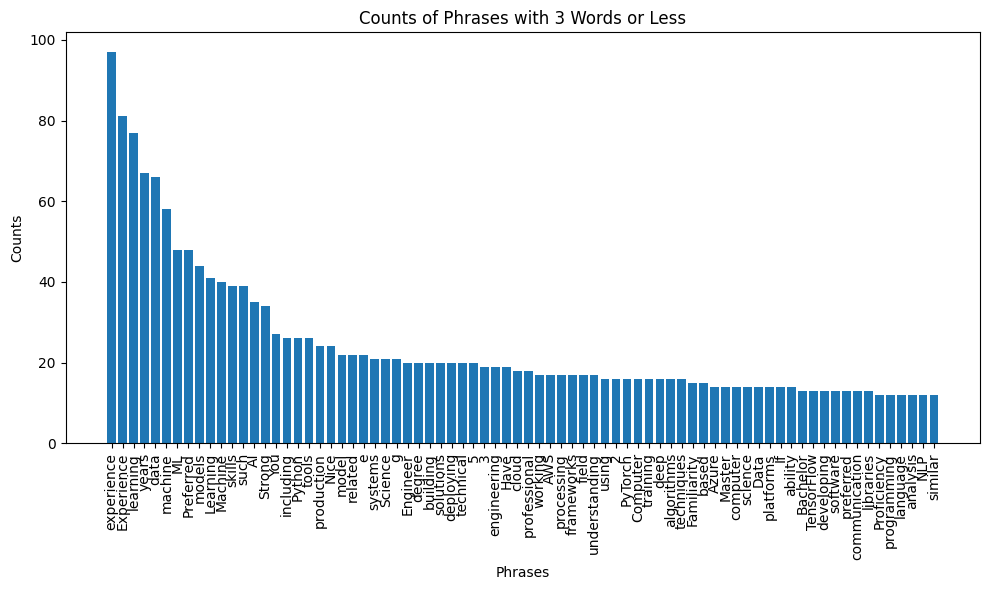

In [14]:
controlled_phrases = [key for key in top_90 if key in top_90_control]

for key in controlled_phrases:
    top_90.pop(key)

bar_plot(top_90)

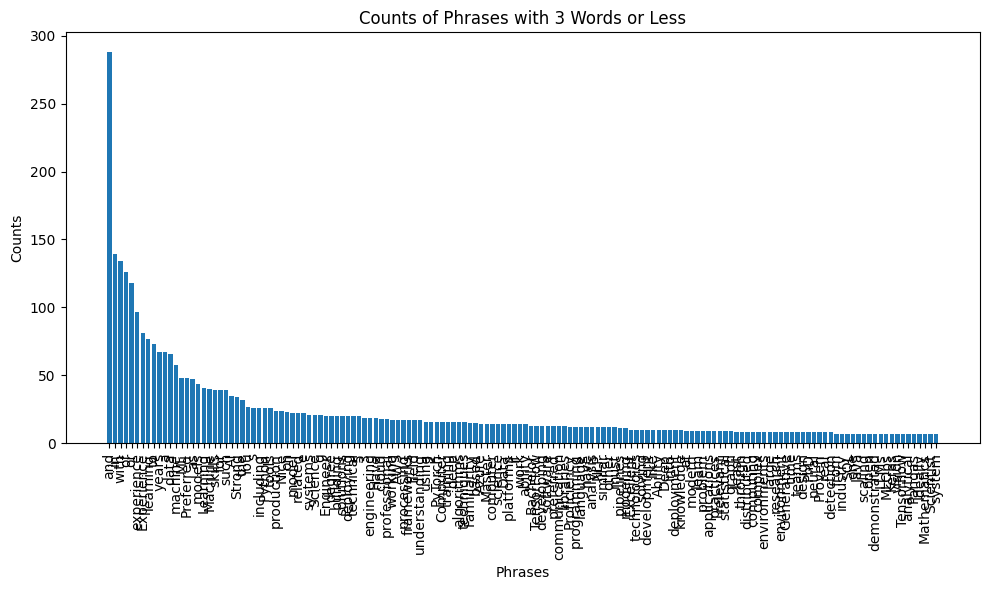

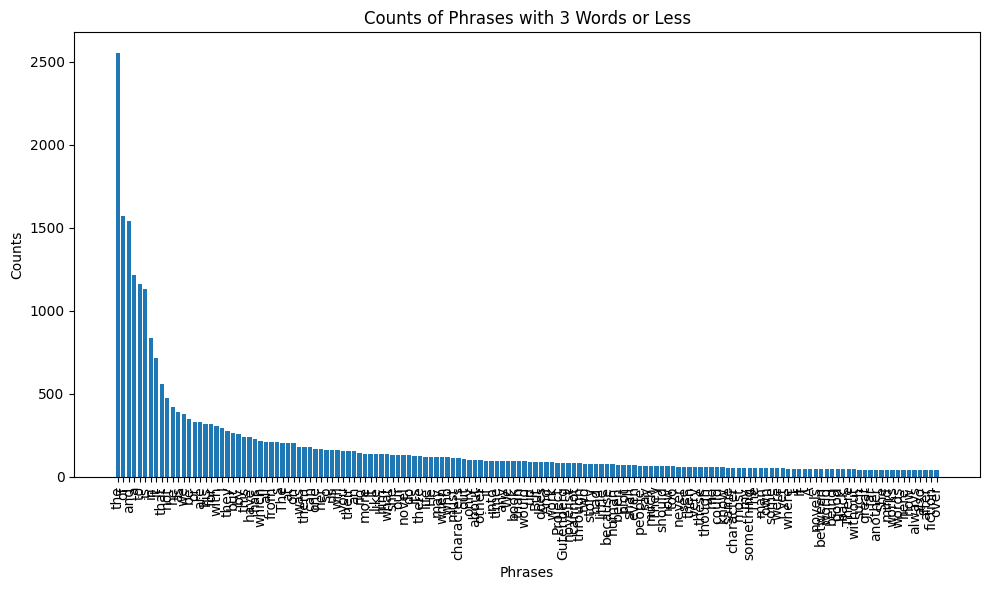

In [15]:
top_150 = extract_phrases_distributions(qualifications, phrase_length=3, top_selected=150)
top_150_control = extract_phrases_distributions(natural_text, phrase_length=3, top_selected=150)
bar_plot(top_150)
bar_plot(top_150_control)

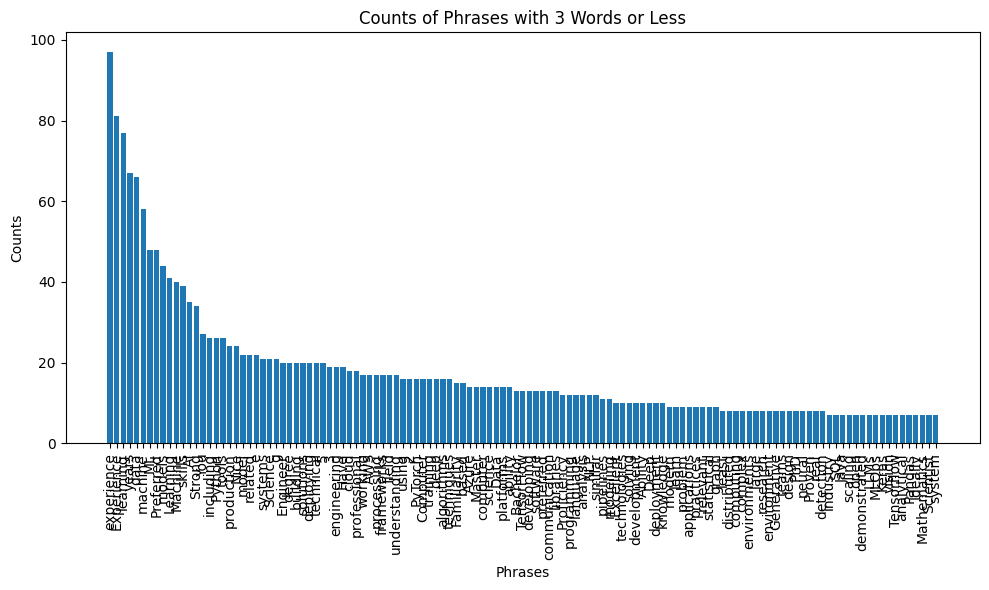

In [16]:
controlled_phrases = [key for key in top_150 if key in top_150_control]

for key in controlled_phrases:
    top_150.pop(key)

bar_plot(top_150)

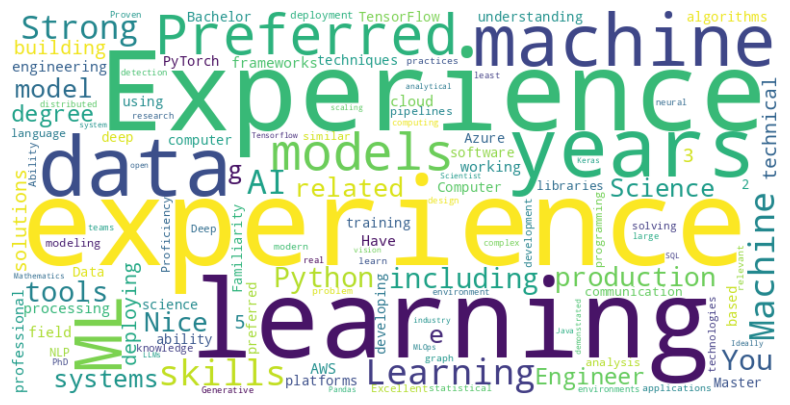

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      relative_scaling='auto').generate_from_frequencies(top_150)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()